In [3]:
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = loadarff('C:/Users/kelvi/Documents/Studium/Master/6.Semester/Time_Series_Prediction/InsectSound/InsectSound/InsectSound.arff')
df = pd.DataFrame(data[0])

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


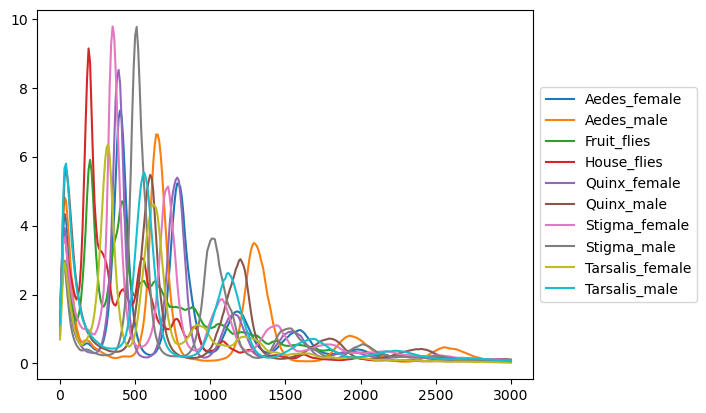

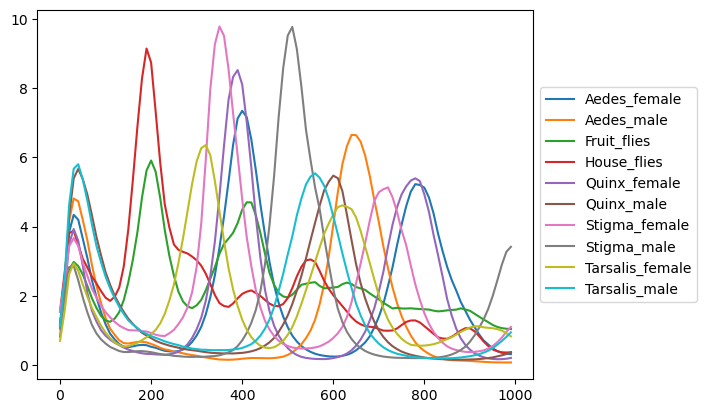

In [38]:
#split the dataframe into 10 dataframes (one for each species)
list_of_dfs = np.array_split(df, 10)
#print(list_of_dataframes[0].shape)

#fourier-transform each timeseries
list_of_fftarrays=[]
for df_i in list_of_dfs:
    values=np.array(df_i.iloc[:, :-1])
    fourier=np.absolute(np.apply_along_axis(np.fft.rfft,1,values))
    list_of_fftarrays.append(fourier)
#plt.plot(list_of_fftarrays[0][0,:])

#average the fourier-transformed time series for every species
list_of_av_ffts=[]
for fft_array in list_of_fftarrays:
    list_of_av_ffts.append(np.sum(fft_array, axis=0)/5000)

    
frequencies=np.fft.rfftfreq(600, d=1/6000)
classes=["Aedes_female", "Aedes_male", "Fruit_flies", "House_flies", "Quinx_female", "Quinx_male", "Stigma_female", "Stigma_male", "Tarsalis_female", "Tarsalis_male"]

for i in range(len(list_of_av_ffts)):
    plt.plot(frequencies,list_of_av_ffts[i], label=classes[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for i in range(len(list_of_av_ffts)):
    plt.plot(frequencies[:100],list_of_av_ffts[i][:100], label=classes[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


